In [1]:
# importar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [4]:



# Função odeint para OD/DBO analítica 
# dLdt = -kd*L ; dODdt = -kd*L + kd*(Os - OD)

def funcao (z, t):
    # Constantes da reação

    Os = 9.0
    kd = 0.5

    L, OD = z # Definir as 'variaveis variaveis'

    # Definir as funções
    dLdt = -kd*L
    dODdt = -kd*L + kd*(Os - OD)

    return dLdt, dODdt

# Condições iniciais

L0 = 100.0
OD0 = 8.0
z0 = L0, OD0


# Passo no tempo

t = np.linspace(0,100,300)


In [5]:
# Integrar as equações com odeint

funcao_resolvida = odeint(funcao, z0, t)
L, OD = funcao_resolvida.T

C:\Users\User\AppData\Local\Temp/ipykernel_13304/3729678290.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


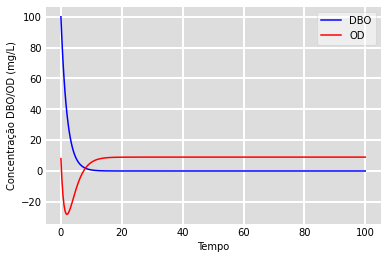

In [6]:
# Plotar o resultado

fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot (t, L, 'b', label = 'DBO')
ax.plot (t, OD, 'r', label = 'OD')
ax.set_xlabel ('Tempo')
ax.set_ylabel ('Concentração DBO/OD (mg/L)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


In [20]:
# Utilizando as equações OD/DBO + cargas (w)

# Função DBO/OD 
# dLdt = -kd * L + w1/V ; dODdt = -kd*L + ka*(Os-OD) + w2/V

def funcao2 (z, t):

    # Constantes da reação

    Os = 9.0
    kd = 0.5
    ka = 0.3
    w1 = 20
    w2 = 5
    V = 100 

    L, OD = z

    dLdt = -kd*L +w1/V
    dODdt = -kd*L + ka*(Os - OD) + w2/V

    return dLdt, dODdt

# Condições iniciais

L0 = 100.0
OD0 = 8.0
z_in = L0, OD0


# Passo no tempo

dt = np.linspace(0,100,300)

In [21]:
funcao_carga = odeint(funcao2, z_in, dt)
L1, OD1 = funcao_carga.T

C:\Users\User\AppData\Local\Temp/ipykernel_13304/604760211.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


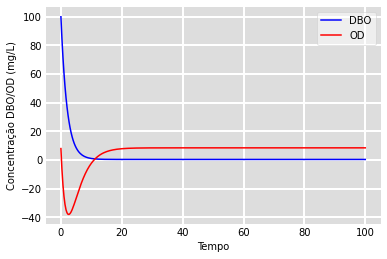

In [22]:
# Plotar o resultado

fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot (dt, L1, 'b', label = 'DBO')
ax.plot (dt, OD1, 'r', label = 'OD')
ax.set_xlabel ('Tempo')
ax.set_ylabel ('Concentração DBO/OD (mg/L)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [45]:
# Utilizando as equações OD/DBO + cargas (w) + balanço hidrico simplificado

# Função DBO/OD 

# VdLdt + L*bal_hid = -kd * L * V + w1 - Q_saida*L ; 
# dLdt = -L * ((bal_hid + Q_saida + kd*V)/V) + w1/V 
# dLdt = -L * m1 + carga1

# VdODdt + OD*bal_hid = -kd*L*V + ka*(Os-OD) * V + w2 - Q_saida*OD;
# dODdt = -OD * ((bal_hid + Q_saida - ka * V)/V) + w2/V - kd*L + ka*Os
# dODdt = -OD * m2 + carga2

# bal_hid = Q_1 + Q_2 - Q_saida

def funcao3 (z, t):

    L, OD = z
    
    # Constantes da reação

    Os = 9.0
    kd = 0.15
    ka = 0.3
    w1 = 20.0
    w2 = 5.0
    V = 100

    Q_1 = 0.5
    Q_2 = 0.5
    Q_saida = 0.2 
    bal_hid = Q_1 + Q_2 - Q_saida

    m1 = ((bal_hid + kd*V + Q_saida)/V)
    m2 = ((bal_hid - ka * V + Q_saida)/V)
    carga1 = w1/V
    carga2 = w2/V - kd*L + ka*Os
  

    dLdt = -L*m1 + carga1
    dODdt = -OD*m2 + carga2
    

    return dLdt, dODdt

# Condições iniciais

L0_2 = 100.0
OD0_2 = 8.0
z_in_2 = L0_2, OD0_2


# Passo no tempo

dt = np.linspace(0,100,300)

In [46]:
funcao_carga_bal_hid = odeint(funcao3, z_in_2, dt)
L2, OD2 = funcao_carga_bal_hid.T

In [ ]:
# Plotar o resultado

fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot (dt, L2, 'b', label = 'DBO')
ax.plot (dt, OD2, 'r', label = 'OD')
ax.set_xlabel ('Tempo')
ax.set_ylabel ('Concentração DBO/OD (mg/L)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [31]:
# Utilizando as equações OD/DBO completas + cargas (w) + balanço hidrico simplificado

# Função DBO/OD 

# VdLdt + L*bal_hid = + w1 - Q_saida*L - kd*L*V - k_sed*(1-L_part)*V*L + r_ca*r_oc*k_ra*alpha*V; 

# dLdt = -L * ((bal_hid + Q_saida + kd*V + K_sed*(1-L_part)*V) /V) + w1/V + r_ca*r_oc*k_ra*alpha;

# dLdt = -L * m1 + carga1

# VdODdt + OD*bal_hid = -kd*L*V + ka*(Os-OD)*V - r_on*k_n*L_n*V + pa*V - r_ca*r_oc*k_ra*alpha*V - (SOD/H)*V + w2 - Q_saida*OD;

# dODdt = -OD * ((bal_hid + Q_saida - ka*V)/V) + w2/V - kd*L + ka*Os - r_on*k_n*L_n + pa - r_ca*r_oc*k_ra*alpha - SOD/H

# dODdt = -OD * m2 + carga2

# bal_hid = Q_1 + Q_2 - Q_saida

In [291]:
def funcao4 (z, t):

    L3, OD3 = z
    
    # Constantes da reação

    Os = 9.0 *(10**3) #mgO2/m3
    L_part = 0.5 #adimensional
    alpha = 12.8 #ug/L = mg/m3
    SOD = 1000 #mgO2/m^2 d
    H = 5.6 #m
    v_s = 1 #m/d
    Na = 0.157 * (10**3) #mgN/m3
        
    kd = 1.5 #d^-1
    ka = 0.3 #d^-1    
    k_sed = v_s/H #d^-1
    k_g = 0.15 #d^-1
    r_ca = 50 #gC/gChla
    r_oc = 2.67 #gO/gC
    r_on = 4.2 #gO/gN 
    k_ra = 0.05 #d^-1
    k_n = 0.1 #d^-1
    pa = r_oc*r_ca*k_g*alpha*(10**3) #mg/m3

    w1 = 20.0 #mg/d
    w2 = 5.0 #mg/d
    V =  25.6 * (10**6) #m³

    Q_F4 = 2.0 * 86400 #m3/d
    Q_TD4 = 0.3 * 86400 #m3/d
    Q_TE10 = 0.15 * 86400 #m3/d
    Q_saida = 0.2 * 86400 #m3/d
    # bal_hid = Q_F4 + Q_TD4 + Q_TE10 - Q_saida
    P = 120 #mm/d - #atenção
    E = 2.5 #mm/d
    As = 5971000 #m2
    bal_hid = Q_F4 + Q_TD4 + Q_TE10 - Q_saida + P*As - E*As
    # bal_hid = 17689999.0

    m1 = ((bal_hid + Q_saida + kd*V + k_sed*(1-L_part)*V) /V)
    m2 = ((bal_hid - ka * V + Q_saida)/V)
    # m2 = 2
    carga1 = w1/V + r_ca*r_oc*k_ra*alpha
    carga2 = w2/V - kd*L3 + ka*Os - r_on*k_n*Na + pa - r_ca*r_oc*k_ra*alpha - SOD/H
    # carga2 = w2/V - kd*L3 + ka*Os - r_on*k_n*Na - r_ca*r_oc*k_ra*alpha - SOD/H + pa #pa retirado; ka alterado para 0.3

    dLdt = -L3*m1 + carga1
    dODdt = -OD3*m2 + carga2

    return dLdt, dODdt

# Condições iniciais

L0_3 = 1.5 * (10**3) # mgO2/m3
OD0_3 = 5.8 * (10**3) #mgO2/m3
z_in_3 = L0_3, OD0_3


# Passo no tempo

dt = np.linspace(0,100,300)

In [292]:
funcao_carga_bal_hid_completo = odeint(funcao4, z_in_3, dt)
L3, OD3 = funcao_carga_bal_hid_completo.T
dODdt

array([ 1.01264326e+05, -1.36043962e+02, -1.28476687e+02, -1.11945738e+02,
       -9.79591998e+01, -8.61264481e+01, -7.61158216e+01, -6.76467314e+01,
       -6.04817962e+01, -5.44201892e+01, -4.92920090e+01, -4.49535173e+01,
       -4.12831097e+01, -3.81779082e+01, -3.55508766e+01, -3.33283816e+01,
       -3.14481286e+01, -2.98574156e+01, -2.85116566e+01, -2.73731309e+01,
       -2.64099268e+01, -2.55950465e+01, -2.49056496e+01, -2.43224129e+01,
       -2.38289888e+01, -2.34115471e+01, -2.30583873e+01, -2.27596105e+01,
       -2.25068423e+01, -2.22929979e+01, -2.21120834e+01, -2.19590280e+01,
       -2.18295415e+01, -2.17199946e+01, -2.16273169e+01, -2.15489106e+01,
       -2.14825781e+01, -2.14264602e+01, -2.13789838e+01, -2.13388183e+01,
       -2.13048379e+01, -2.12760902e+01, -2.12517693e+01, -2.12311936e+01,
       -2.12137863e+01, -2.11990596e+01, -2.11866007e+01, -2.11760603e+01,
       -2.11671430e+01, -2.11595989e+01, -2.11532165e+01, -2.11478169e+01,
       -2.11432488e+01, -

C:\Users\User\AppData\Local\Temp/ipykernel_13304/2716221297.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


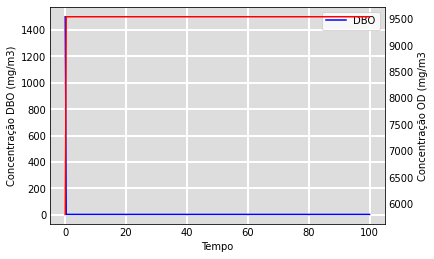

In [289]:
fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot (dt, L3, 'b', label = 'DBO')
ax1 = ax.twinx()
# for i in range(len(OD3)):
#     if OD3[i] <= 12419.999999999998:
#         ax1.plot (dt, OD3, 'r', label = 'OD')
#     else:
#         ax1.plot(dt, 12419.999999999998, 'r', label = 'OD')
ax1.plot (dt, OD3, 'r', label = 'OD')
ax.set_xlabel ('Tempo')
ax.set_ylabel ('Concentração DBO (mg/m3)')
ax1.set_ylabel('Concentração OD (mg/m3')
ax.yaxis.set_tick_params(length=0)
ax1.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    legend = ax.legend()
# legend2 = ax1.legend()
# legend2.get_frame().set_alpha(0.5)
# for spine in ('top', 'right', 'bottom', 'left'):
#     ax1.spines[spine].set_visible(False)
plt.show()

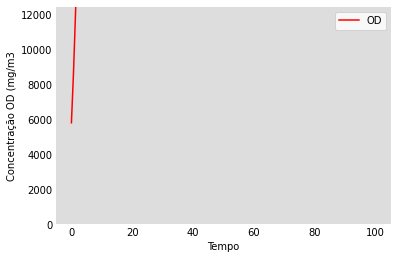

In [120]:
fig2 = plt.figure(facecolor = 'w')
ax1 = fig2.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax1.plot (dt, OD3, 'r', label = 'OD')
ax1.set_xlabel ('Tempo')
ax1.set_ylabel('Concentração OD (mg/m3')
ax1.set_ylim(0, 12419.999999999998)
ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)
#ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
legend1 = ax1.legend()
legend1.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax1.spines[spine].set_visible(False)
    legend1 = ax1.legend()
plt.show()

In [283]:
Os = 9.0 *(10**3) #mgO2/m3
L_part = 0.5 #adimensional
alpha = 12.8 #ug/L = mg/m3
SOD = 1000 #gO2/m^2 d
H = 5.6 #m
v_s = 1 #m/d
Na = 0.157 * (10**3) #mgN/m3
        
kd = 1.5 #d^-1
ka = 0.3 #d^-1    
k_sed = v_s/H #d^-1
k_g = 0.15 #d^-1
r_ca = 50 #gC/gChla
r_oc = 2.67 #gO/gC
r_on = 4.2 #gO/gN 
k_ra = 0.05 #d^-1
k_n = 0.1 #d^-1
pa = r_oc*r_ca*k_g*alpha*(10**3) #mg/m3

w1 = 20.0 #mg/d
w2 = 5.0 #mg/d
V =  25.6 * (10**6) #m³

Q_F4 = 200000 #m3/d
Q_TD4 = 50000 #m3/d
Q_TE10 = 20000 #m3/d
Q_saida = 1 #m3/d
P = 120.0 #mm/d - #atenção
E = 2.5 #mm/d
As = 5971000 #m2
bal_hid = Q_F4 + Q_TD4 + Q_TE10 - Q_saida + P*As - E*As
# bal_hid = 8689999.0

m1 = ((bal_hid + Q_saida + kd*V + k_sed*(1-L_part)*V) /V)
m2 = ((bal_hid - ka * V + Q_saida)/V)
# m2 = 1
carga1 = w1/V + r_ca*r_oc*k_ra*alpha
carga2 = w2/V - kd*L + ka*Os - r_on*k_n*Na + pa - r_ca*r_oc*k_ra*alpha - SOD/H 
#carga2 = w2/V - kd*L + ka*Os - r_on*k_n*Na - r_ca*r_oc*k_ra*alpha - SOD/H #pa retirado; ka dividido pela metade

dLdt = -L3*m1 + carga1
dODdt = -OD3*m2 + carga2

kd*L


array([ 1.50000000e+02,  1.26901502e+02,  1.07359942e+02,  9.08275863e+01,
        7.68410477e+01,  6.50082960e+01,  5.49976695e+01,  4.65285793e+01,
        3.93636441e+01,  3.33020372e+01,  2.81738570e+01,  2.38353652e+01,
        2.01649577e+01,  1.70597562e+01,  1.44327246e+01,  1.22102296e+01,
        1.03299765e+01,  8.73926358e+00,  7.39350452e+00,  6.25497888e+00,
        5.29177478e+00,  4.47689446e+00,  3.78749756e+00,  3.20426087e+00,
        2.71083679e+00,  2.29339507e+00,  1.94023520e+00,  1.64145841e+00,
        1.38869026e+00,  1.17484587e+00,  9.93931371e-01,  8.40875895e-01,
        7.11389430e-01,  6.01842585e-01,  5.09164857e-01,  4.30758570e-01,
        3.64426066e-01,  3.08308105e-01,  2.60831746e-01,  2.20666271e-01,
        1.86685877e-01,  1.57938122e-01,  1.33617234e-01,  1.13041519e-01,
        9.56342581e-02,  8.09075436e-02,  6.84485935e-02,  5.79081964e-02,
        4.89909152e-02,  4.14468061e-02,  3.50644136e-02,  2.96648459e-02,
        2.50967571e-02,  

<AxesSubplot:ylabel='Concentração OD (mg/m3'>